In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
#Calculate lower and uper limit for threshold 1

lower_limit = df["Height"].quantile(0.01)
upper_limit = df["Height"].quantile(0.99)

In [5]:
lower_limit

np.float64(58.13441158671655)

In [6]:
upper_limit

np.float64(74.7857900583366)

**Trimming**

In [7]:
#Trimming

new_df = df[(df["Height"]<=upper_limit) & (df["Height"]>=lower_limit)]

In [8]:
new_df.shape

(9800, 3)

In [9]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

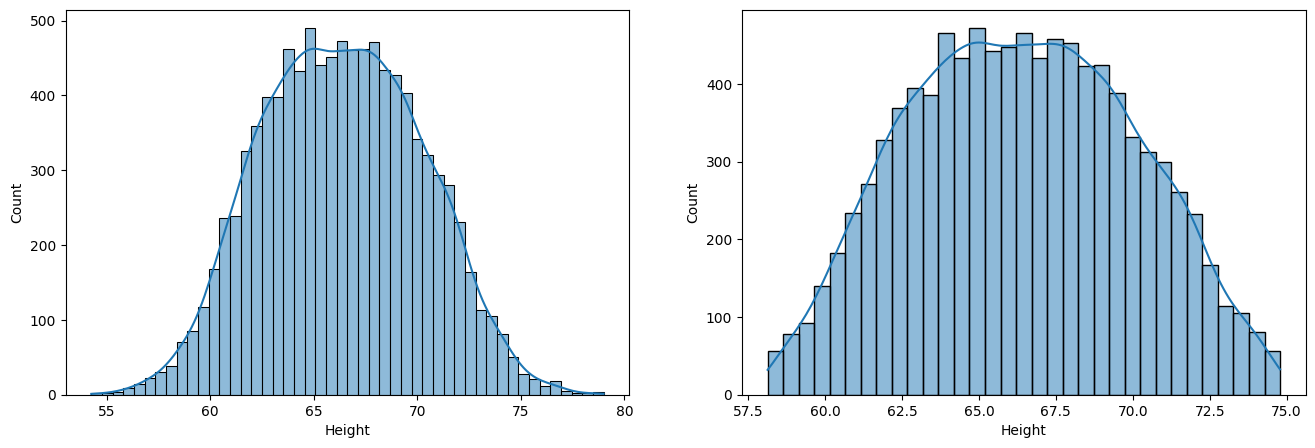

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df["Height"], kde=True)

plt.subplot(1,2,2)
sns.histplot(new_df["Height"], kde=True)
plt.show()

**Capping**

In [12]:
#Capping
capped_df = df.copy()

capped_df["Height"] = np.where(
    df["Height"]>=upper_limit,
    upper_limit,
    np.where(
        df["Height"]<=lower_limit,
        lower_limit,
        df["Height"]
    )
)
capped_df.shape

(10000, 3)

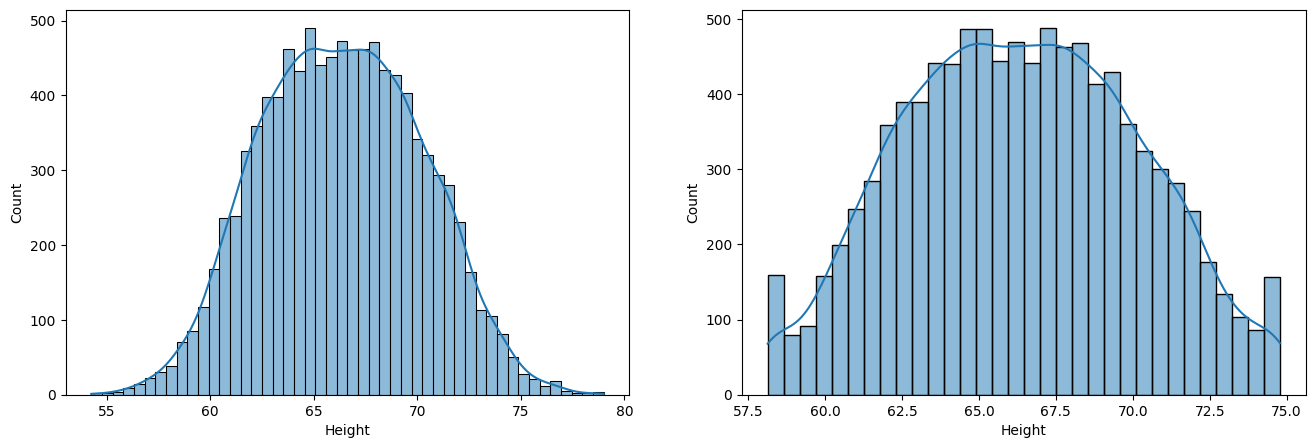

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df["Height"], kde=True)

plt.subplot(1,2,2)
sns.histplot(capped_df["Height"], kde=True)
plt.show()

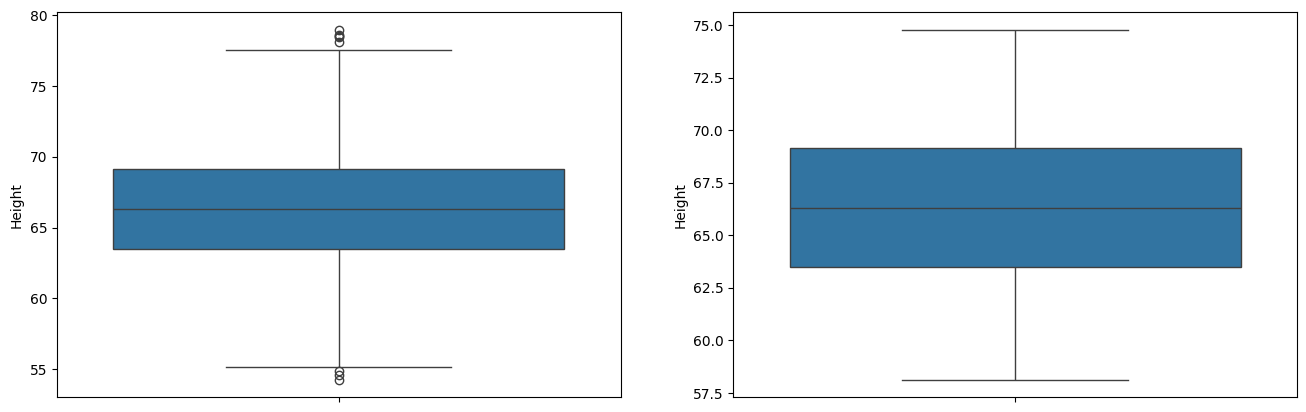

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df["Height"])

plt.subplot(1,2,2)
sns.boxplot(capped_df["Height"])

plt.show()